# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [1]:
# beer dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


How would you cluster these beers?

In [12]:
# TODO - define X
X = beer[['calories','sodium','alcohol','cost']]


What happened to y?

## Part 1: K-means clustering

In [13]:
# K-means with 3 clusters
from sklearn.cluster import KMeans

# TODO - initial k-means to 3 clusters, and fit it
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int32)

In [132]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort('cluster')

/home/ddan/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,2
4,Heineken,152,11,5.0,0.77,0,2
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0


What do the clusters seem to be based on? Why?

A: Seems like calories is the most influential feature. Because we didn't normalize the units.

In [16]:
# TODO - review the cluster centers. What's the command?
print km.cluster_centers_

[[ 150.           17.            4.52142857    0.52071429]
 [ 102.75         10.            4.075         0.44      ]
 [  70.           10.5           2.6           0.42      ]]


In [30]:
# TODO - calculate the mean of each feature for each cluster
for c in beer.cluster.unique():
    selection = beer.loc[beer['cluster'] == c]
    print '\nCluster: ',c
    print 'calories: ',selection.calories.mean()
    print 'sodium: ',selection.sodium.mean()
    print 'alcohol: ',selection.alcohol.mean()
    print 'cost: ',selection.cost.mean()


Cluster:  0
calories:  150.0
sodium:  17.0
alcohol:  4.52142857143
cost:  0.520714285714

Cluster:  1
calories:  102.75
sodium:  10.0
alcohol:  4.075
cost:  0.44

Cluster:  2
calories:  70.0
sodium:  10.5
alcohol:  2.6
cost:  0.42


In [31]:
print beer.groupby('cluster').mean()

         calories  sodium   alcohol      cost
cluster                                      
0          150.00    17.0  4.521429  0.520714
1          102.75    10.0  4.075000  0.440000
2           70.00    10.5  2.600000  0.420000


In [32]:
# TODO - save the DataFrame above of cluster centers
centers = beer.groupby('cluster').mean()

In [33]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [47]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

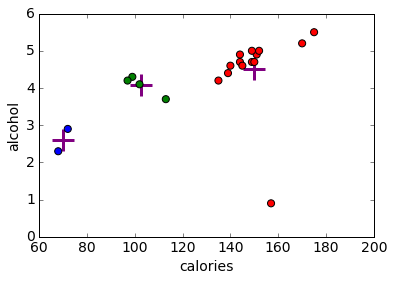

In [51]:
# TODO - scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
# hint: color in a plot is usually specified with c=array
# Hopefully plotting is becoming familiar to you now!

# TODO - cluster centers, marked by "+"
# Just make sure you understand this command: 
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=500, c='purple')
plt.scatter(beer.calories, beer.alcohol,linewidths=1, s=50, c=colors[beer.cluster])

# TODO - always remember to add labels!
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f952b953450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f952907f090>]], dtype=object)

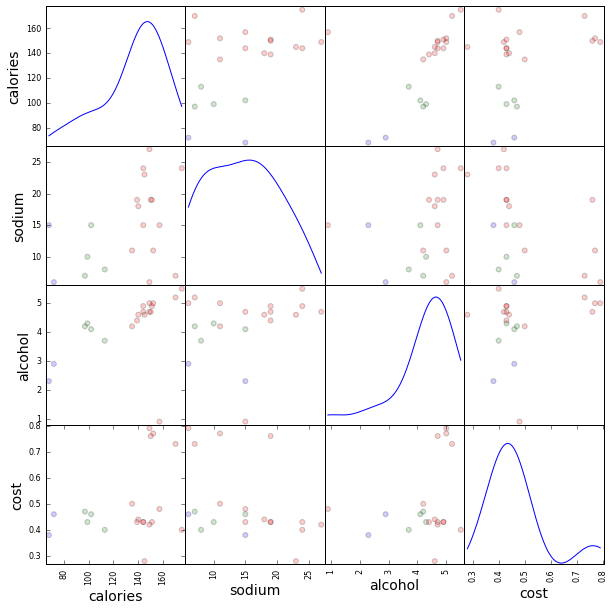

In [56]:
# TODO - scatter plot matrix (0=red, 1=green, 2=blue)
# Any observations?
# hint: figsize=(10,10), s=100, looks good
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X, c=colors[beer.cluster], alpha=0.2, figsize=(10,10), s=100, diagonal='kde')

### Repeat with scaled data

In [57]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# TODO - repeat K-means with 3 clusters on scaled data
km_s = KMeans(n_clusters=3)
km_s.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
# TODO - save the cluster labels and sort by cluster
beer['scaled_cluster'] = km_s.labels_
beer.sort('scaled_cluster')

/home/ddan/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
10,Coors,140,18,4.6,0.44,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1
12,Michelob_Light,135,11,4.2,0.50,0,1


What are the "characteristics" of each cluster?

#Clusters are distributed more equally

In [63]:
# TODO - review the cluster centers
scaled_centers = km_s.cluster_centers_
print scaled_centers

[[ 0.5361335   0.96264295  0.51632566 -0.61618888]
 [-0.92065895 -0.6352664  -0.86290041 -0.33288365]
 [ 0.7690509  -0.6547531   0.69314951  1.89814505]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9528551350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9523c7ab90>]], dtype=object)

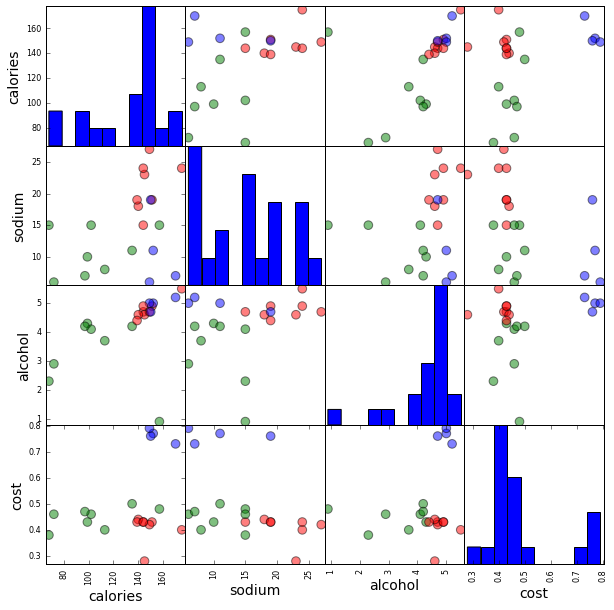

In [72]:
# TODO - scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.scaled_cluster], figsize=(10,10), s=300)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [81]:
# TODO - calculate SC for our model
from sklearn import metrics
metrics.silhouette_score(X_scaled, labels=km_s.labels_, metric = 'euclidean')

0.45777415910909475

In [79]:
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [78]:
km_s.labels_

array([0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1], dtype=int32)

In [125]:
# TODO - calculate SC for K=2 through K=19
SC_results = []
k_list = range(2,20)
for k in k_list:
    km_new=KMeans(n_clusters=k, random_state=None)
    km_new.fit(X_scaled)
    sc = metrics.silhouette_score(X_scaled,labels=km_new.labels_)
    SC_results.append(sc)
print SC_results

[0.33071506469818307, 0.45777415910909475, 0.47546412252215964, 0.44406582701642483, 0.36539011140206579, 0.33907631703717861, 0.29766539203489123, 0.26989826216947621, 0.26720480054972856, 0.25495898824119195, 0.26813422717352492, 0.2580624498560809, 0.19510367184524083, 0.18397769400607461, 0.12332923155351708, 0.13272517919240542, 0.097953910636662755, 0.053572348458556004]


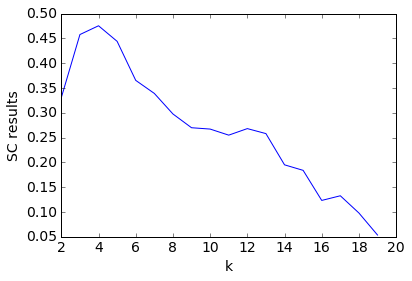

In [126]:
# TODO - plot the results (SC vs k)
# Don't forget to label!

plt.plot(k_list,SC_results)
plt.xlabel('k')
plt.ylabel('SC results')

## Part 3: DBSCAN clustering

In [129]:
# TODO - DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)


DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [130]:
# TODO - review the cluster labels
db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2,  0, -1,  1, -1,  0,
        0, -1,  2])

In [133]:
# save the cluster labels and sort by cluster
beer['db_cluster'] = db.labels_
beer.sort('db_cluster')

/home/ddan/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster,scaled_cluster,db_cluster
2,Lowenbrau,157,15,0.9,0.48,0,1,-1
5,Old_Milwaukee,145,23,4.6,0.28,0,0,-1
6,Augsberger,175,24,5.5,0.40,0,0,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,2,1,-1
13,Becks,150,19,4.7,0.76,0,2,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,-1
0,Budweiser,144,15,4.7,0.43,0,0,0
1,Schlitz,151,19,4.9,0.43,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,0


In [138]:
#Drop cluster and scaled cluster columns
beer = beer.drop('cluster', 1)
beer = beer.drop('scaled_cluster',1)
beer

,name,calories,sodium,alcohol,cost,db_cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,-1
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
5,Old_Milwaukee,145,23,4.6,0.28,-1
6,Augsberger,175,24,5.5,0.40,-1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
8,Miller_Lite,99,10,4.3,0.43,2
9,Budweiser_Light,113,8,3.7,0.40,2


In [139]:
# review the cluster centers
beer.groupby('db_cluster').mean()

,calories,sodium,alcohol,cost
db_cluster,,,,
-1,127.833333,17.0,3.483333,0.460000
0,143.142857,19.0,4.628571,0.440000
1,157.000000,8.0,5.066667,0.763333
2,102.750000,10.0,4.075000,0.440000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9521e10890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9521690cd0>]], dtype=object)

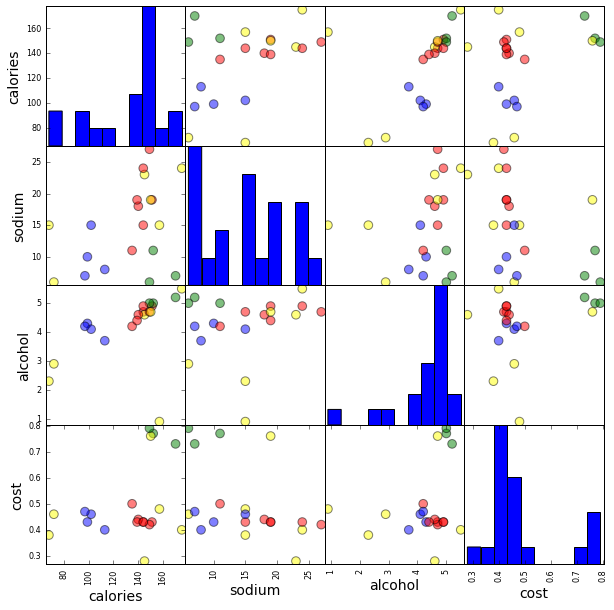

In [141]:
# TODO - scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[beer.db_cluster], figsize=(10,10), s=300)